In [ ]:
!pip install tensorflow==1.13.2

     |████████████████████████████████| 92.7 MB 20 kB/s 
     |████████████████████████████████| 3.2 MB 45.1 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 367 kB 76.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you 

In [ ]:
!pip install pyarabic
!pip install farasapy
!pip install tqdm
!pip install numpy
!pip install seaborn
!pip install matplotlib

     |████████████████████████████████| 126 kB 5.3 MB/s 


In [1]:
from google.colab import drive, auth
drive.mount('/content/drive')
auth.authenticate_user()

Mounted at /content/drive


In [2]:
!curl https://sdk.cloud.google.com | bash

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/surface/privateca/roots/set_iam_policy.yaml
google-cloud-sdk/lib/surface/privateca/roots/undelete.py
google-cloud-sdk/lib/surface/privateca/roots/update.py
google-cloud-sdk/lib/surface/privateca/subordinates/__init__.py
google-cloud-sdk/lib/surface/privateca/subordinates/activate.py
google-cloud-sdk/lib/surface/privateca/subordinates/add_iam_policy_binding.yaml
google-cloud-sdk/lib/surface/privateca/subordinates/create.py
google-cloud-sdk/lib/surface/privateca/subordinates/delete.py
google-cloud-sdk/lib/surface/privateca/subordinates/describe.yaml
google-cloud-sdk/lib/surface/privateca/subordinates/disable.py
google-cloud-sdk/lib/surface/privateca/subordinates/enable.py
google-cloud-sdk/lib/surface/privateca/subordinates/get_csr.py
google-cloud-sdk/lib/surface/privateca/subordinates/get_iam_policy.yaml
google-cloud-sdk/lib/surface/privateca/subordinates/list.py
google-cloud-sdk/lib/surface/privateca/subordinates/re

In [3]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: wlc.evan@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] wlc.evan@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [wlc.evan@gmail.com].

Pick cloud project to use: 
 [1] bertlado
 [2] Cr

In [12]:
!cp -r "/content/bert-base-arabertv2" "/content/drive/MyDrive"
!cp -r "/content/arabert-master" "/content/drive/MyDrive"

In [4]:
!mkdir bert-base-arabertv2
#!gsutil -m cp -r "gs://ladobucket/NADI2021_DEV.1.0" ./
#!gsutil -m cp -r "gs://ladobucket/NADI2021_TEST.1.0" ./
!gsutil -m cp -r "gs://ladobucket/arabert-master" ./
!gsutil -m cp -r "gs://ladobucket/ArabicDialectsDataset" ./
!gsutil -m cp -r "gs://ladobucket/bert-base-arabertv2/*" ./bert-base-arabertv2


Copying gs://ladobucket/arabert-master/.gitignore...
Copying gs://ladobucket/arabert-master/AJGT.xlsx...
Copying gs://ladobucket/arabert-master/LABR/.git/hooks/applypatch-msg.sample...
Copying gs://ladobucket/arabert-master/LABR/.git/HEAD...
Copying gs://ladobucket/arabert-master/LABR/.git/config...
Copying gs://ladobucket/arabert-master/LABR/.git/hooks/commit-msg.sample...
Copying gs://ladobucket/arabert-master/LABR/.git/hooks/fsmonitor-watchman.sample...
Copying gs://ladobucket/arabert-master/LABR/.git/hooks/post-update.sample...
Copying gs://ladobucket/arabert-master/LABR/.git/description...
Copying gs://ladobucket/arabert-master/LABR/.git/hooks/pre-applypatch.sample...
Copying gs://ladobucket/arabert-master/LABR/.git/hooks/pre-commit.sample...
Copying gs://ladobucket/arabert-master/LABR/.git/hooks/pre-merge-commit.sample...
Copying gs://ladobucket/arabert-master/LABR/.git/hooks/pre-push.sample...
Copying gs://ladobucket/arabert-master/LABR/.git/hooks/pre-rebase.sample...
Copying gs

In [ ]:
import os
import json
import logging
import tensorflow as tf

# configure logging
log = logging.getLogger('tensorflow')
log.setLevel(logging.INFO)

# create formatter and add it to the handlers
formatter = logging.Formatter('%(asctime)s :  %(message)s')
sh = logging.StreamHandler()
sh.setLevel(logging.INFO)
sh.setFormatter(formatter)
log.handlers = [sh]

if 'COLAB_TPU_ADDR' in os.environ:
  log.info("Using TPU runtime")
  USE_TPU = True
  TPU_ADDRESS = 'grpc://' + os.environ['COLAB_TPU_ADDR']

  with tf.Session(TPU_ADDRESS) as session:
    log.info('TPU address is ' + TPU_ADDRESS)
    # Upload credentials to TPU.
    with open('/content/drive/MyDrive/bertlado-4dd33c70e8d3.json', 'r') as f:
      auth_info = json.load(f)
    tf.contrib.cloud.configure_gcs(session, credentials=auth_info)
    
else:
  log.warning('Not connected to TPU runtime')
  USE_TPU = False

2021-08-26 18:18:29,778 :  Using TPU runtime
2021-08-26 18:18:29,781 :  TPU address is grpc://10.5.26.42:8470


In [ ]:
import sys
sys.path.append("/content/arabert-master")
import preprocess
sys.path.append("/content/arabert-master/arabert")
import modeling, optimization
from run_classifier import input_fn_builder, model_fn_builder, InputExample, convert_examples_to_features

model_name = "aubmindlab/bert-base-arabertv2"

arabert_preprocess = preprocess.ArabertPreprocessor(model_name=model_name)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


100%|██████████| 241M/241M [00:42<00:00, 5.32MiB/s]

[2021-08-26 18:19:16,773 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


#Prepare Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
sys.path.append("..")
from tqdm import tqdm

tqdm.pandas()

class Dataset:
    def __init__(
        self,
        name,
        train,
        test,
        label_list,
        train_InputExamples=None,
        test_InputExamples=None,
        train_features=None,
        test_features=None,
    ):
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list
        self.train_InputExamples = train_InputExamples
        self.test_InputExamples = test_InputExamples
        self.train_features = train_features
        self.test_features = test_features

all_datasets = []

countries_label = ['Iraq','Egypt','Algeria','Yemen','Saudi_Arabia','Syria','United_Arab_Emirates',
                   'Oman','Jordan','Tunisia','Kuwait','Morocco','Libya','Qatar',
                   'Lebanon','Sudan','Mauritania','Palestine','Somalia','Bahrain','Djibouti']

province_label = ['ae_Abu-Dhabi','ae_Dubai','ae_Ras-Al-Khaymah',
                  'bh_Capital','dj_Djibouti','dz_Batna','dz_Biskra',
                  'dz_Bouira','dz_Béchar','dz_Constantine','dz_El-Oued',
                  'dz_Khenchela','dz_Oran','dz_Ouargla','eg_Alexandria',
                  'eg_Aswan','eg_Asyut','eg_Beheira','eg_Beni-Suef',
                  'eg_Dakahlia','eg_Faiyum','eg_Gharbia','eg_Ismailia',
                  'eg_Kafr-el-Sheikh','eg_Luxor','eg_Minya','eg_Monufia','eg_North-Sinai',
                  'eg_Port-Said','eg_Qena','eg_Red-Sea','eg_Sohag','eg_South-Sinai',
                  'eg_Suez','iq_Al-Anbar','iq_Al-Muthannia','iq_An-Najaf','iq_Arbil',
                  'iq_As-Sulaymaniyah','iq_Babil','iq_Baghdad','iq_Basra','iq_Dihok',
                  'iq_Karbala','iq_Kirkuk','iq_Ninawa','iq_Wasit','jo_Aqaba',
                  'jo_Zarqa','kw_Hawalli','kw_Jahra','lb_Akkar','lb_North-Lebanon',
                  'lb_South-Lebanon','ly_Al-Butnan','ly_Al-Jabal-al-Akhdar','ly_Benghazi','ly_Darnah','ly_Misrata',
                  'ly_Tripoli','ma_Marrakech-Tensift-Al-Haouz','ma_Meknes-Tafilalet','ma_Souss-Massa-Draa','ma_Tanger-Tetouan',
                  'mr_Nouakchott','om_Ad-Dakhiliyah','om_Ad-Dhahirah','om_Al-Batnah','om_Ash-Sharqiyah',
                  'om_Dhofar','om_Musandam','om_Muscat','ps_Gaza-Strip','ps_West-Bank',
                  'qa_Ar-Rayyan','sa_Al-Madinah','sa_Al-Quassim','sa_Ar-Riyad','sa_Ash-Sharqiyah',
                  'sa_Asir',"sa_Ha'il",'sa_Jizan','sa_Makkah','sa_Najran',
                  'sa_Tabuk','sd_Khartoum','so_Banaadir','so_Woqooyi-Galbeed','sy_Aleppo',
                  'sy_As-Suwayda','sy_Damascus-City','sy_Hama','sy_Hims','sy_Lattakia',
                  'tn_Ariana','tn_Bizerte','tn_Mahdia','tn_Sfax','ye_Aden',
                  'ye_Ibb']

_countries = len(countries_label)
_provinces = len(province_label)

print(f"Number of countries: " + str(_countries))
print(f"Number of provinces: " + str(_provinces))

100%|██████████| 241M/241M [00:47<00:00, 5.12MiB/s]
Number of countries: 21
Number of provinces: 100


#TRAIN DATASET

In [ ]:
#Subtask 1.1 Train MSA Countries
df_MSA_Train_CON = pd.read_csv("/content/NADI2021_DEV.1.0/NADI2021_DEV.1.0/Subtask_1.1+2.1_MSA/MSA_train_labeled.tsv", sep="\t", header=0)

ID_COLUMN = 'guid'
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

df_MSA_Train_CON = df_MSA_Train_CON[["#1_tweetid","#2_tweet","#3_country_label"]]

df_MSA_Train_CON.columns = [ID_COLUMN,DATA_COLUMN, LABEL_COLUMN]

df_MSA_Train_CON["text"] = df_MSA_Train_CON["text"].progress_apply(lambda x: arabert_preprocess.preprocess(x))

train_MSA_Train_CON, test_MSA_Train_CON = train_test_split(df_MSA_Train_CON, test_size=0.2, random_state=42)

data_MSA_Train_CON = Dataset("MSA_Train_CON", train_MSA_Train_CON, test_MSA_Train_CON, countries_label)
all_datasets.append(data_MSA_Train_CON)

100%|██████████| 21000/21000 [00:27<00:00, 758.11it/s]


In [ ]:
#Subtask 2.1 Train MSA Province
df_MSA_Train_PRO = pd.read_csv("/content/NADI2021_DEV.1.0/NADI2021_DEV.1.0/Subtask_1.1+2.1_MSA/MSA_train_labeled.tsv", sep="\t", header=0)

ID_COLUMN = 'guid'
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

df_MSA_Train_PRO = df_MSA_Train_PRO[["#1_tweetid","#2_tweet","#4_province_label"]]

df_MSA_Train_PRO.columns = [ID_COLUMN,DATA_COLUMN, LABEL_COLUMN]

df_MSA_Train_PRO["text"] = df_MSA_Train_PRO["text"].progress_apply(lambda x: arabert_preprocess.preprocess(x))

train_MSA_Train_PRO, test_MSA_Train_PRO = train_test_split(df_MSA_Train_PRO,  test_size=0.2, random_state=42)

data_MSA_Train_PRO = Dataset("MSA_Train_PRO", train_MSA_Train_PRO, test_MSA_Train_PRO, province_label)
all_datasets.append(data_MSA_Train_PRO)

100%|██████████| 21000/21000 [00:27<00:00, 771.76it/s]


In [ ]:
#Subtask 1.2 Train DA Countries
df_DA_Train_CON = pd.read_csv("/content/NADI2021_DEV.1.0/NADI2021_DEV.1.0/Subtask_1.2+2.2_DA/DA_train_labeled.tsv", sep="\t", header=0)

ID_COLUMN = 'guid'
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

df_DA_Train_CON = df_DA_Train_CON[["#1_tweetid","#2_tweet","#3_country_label"]]

df_DA_Train_CON.columns = [ID_COLUMN,DATA_COLUMN, LABEL_COLUMN]

df_DA_Train_CON["text"] = df_DA_Train_CON["text"].progress_apply(lambda x: arabert_preprocess.preprocess(x))

train__DA_Train_CON, test__DA_Train_CON = train_test_split(df_DA_Train_CON, test_size=0.2, random_state=42)

data__DA_Train_CON = Dataset("DA_Train_CON", train__DA_Train_CON, test__DA_Train_CON, countries_label)
all_datasets.append(data__DA_Train_CON)

100%|██████████| 21000/21000 [00:24<00:00, 864.49it/s]


In [ ]:
#Subtask 2.2 Train DA Province
df_DA_Train_PRO = pd.read_csv("/content/NADI2021_DEV.1.0/NADI2021_DEV.1.0/Subtask_1.2+2.2_DA/DA_train_labeled.tsv", sep="\t", header=0)

ID_COLUMN = 'guid'
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

df_DA_Train_PRO = df_DA_Train_PRO[["#1_tweetid","#2_tweet","#4_province_label"]]

df_DA_Train_PRO.columns = [ID_COLUMN,DATA_COLUMN, LABEL_COLUMN]

df_DA_Train_PRO["text"] = df_DA_Train_PRO["text"].progress_apply(lambda x: arabert_preprocess.preprocess(x))

train_DA_Train_PRO, test_DA_Train_PRO = train_test_split(df_DA_Train_PRO, test_size=0.2, random_state=42)

data_DA_Train_PRO = Dataset("DA_Train_PRO", train_DA_Train_PRO, test_DA_Train_PRO, province_label)
all_datasets.append(data_DA_Train_PRO)

100%|██████████| 21000/21000 [00:23<00:00, 882.89it/s]


#TEST DATASET

In [ ]:
#Subtask 1.1 DEV MSA Countries
df_MSA_DEV_CON = pd.read_csv("/content/NADI2021_DEV.1.0/NADI2021_DEV.1.0/Subtask_1.1+2.1_MSA/MSA_dev_labeled.tsv", sep="\t", header=0)

ID_COLUMN = 'guid'
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

df_MSA_DEV_CON = df_MSA_DEV_CON[["#1_tweetid","#2_tweet","#3_country_label"]]

df_MSA_DEV_CON.columns = [ID_COLUMN,DATA_COLUMN, LABEL_COLUMN]

df_MSA_DEV_CON["text"] = df_MSA_DEV_CON["text"].progress_apply(lambda x: arabert_preprocess.preprocess(x))

train_MSA_DEV_CON, test_MSA_DEV_CON = train_test_split(df_MSA_DEV_CON, test_size=df_MSA_DEV_CON["guid"].count()-1, random_state=42)

data_MSA_DEV_CON = Dataset("MSA_DEV_CON", train_MSA_DEV_CON, test_MSA_DEV_CON, countries_label)
all_datasets.append(data_MSA_DEV_CON)

100%|██████████| 5000/5000 [00:06<00:00, 782.52it/s]


In [ ]:
#Subtask 2.1 DEV MSA Province
df_MSA_DEV_PRO = pd.read_csv("/content/NADI2021_DEV.1.0/NADI2021_DEV.1.0/Subtask_1.1+2.1_MSA/MSA_dev_labeled.tsv", sep="\t", header=0)

ID_COLUMN = 'guid'
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

df_MSA_DEV_PRO = df_MSA_DEV_PRO[["#1_tweetid","#2_tweet","#4_province_label"]]

df_MSA_DEV_PRO.columns = [ID_COLUMN,DATA_COLUMN, LABEL_COLUMN]

df_MSA_DEV_PRO["text"] = df_MSA_DEV_PRO["text"].progress_apply(lambda x: arabert_preprocess.preprocess(x))

train_MSA_DEV_PRO, test_MSA_DEV_PRO = train_test_split(df_MSA_DEV_PRO, test_size=df_MSA_DEV_PRO["guid"].count()-1, random_state=42)

data_MSA_DEV_PRO = Dataset("MSA_DEV_PRO", train_MSA_DEV_PRO, test_MSA_DEV_PRO, province_label)
all_datasets.append(data_MSA_DEV_PRO)

100%|██████████| 5000/5000 [00:06<00:00, 809.83it/s]


In [ ]:
#Subtask 1.2 DEV DA Countries
df_DA_DEV_CON = pd.read_csv("/content/NADI2021_DEV.1.0/NADI2021_DEV.1.0/Subtask_1.2+2.2_DA/DA_dev_labeled.tsv", sep="\t", header=0)

ID_COLUMN = 'guid'
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

df_DA_DEV_CON = df_DA_DEV_CON[["#1_tweetid","#2_tweet","#3_country_label"]]

df_DA_DEV_CON.columns = [ID_COLUMN,DATA_COLUMN, LABEL_COLUMN]

df_DA_DEV_CON["text"] = df_DA_DEV_CON["text"].progress_apply(lambda x: arabert_preprocess.preprocess(x))

train_DA_DEV_CON, test_DA_DEV_CON = train_test_split(df_DA_DEV_CON, test_size=df_DA_DEV_CON["guid"].count()-1, random_state=42)

data_DA_DEV_CON = Dataset("DA_DEV_CON", train_DA_DEV_CON, test_DA_DEV_CON, countries_label)
all_datasets.append(data_DA_DEV_CON)

100%|██████████| 5000/5000 [00:05<00:00, 882.14it/s]


In [ ]:
#Subtask 2.2 DEV DA Province
df_DA_DEV_PRO = pd.read_csv("/content/NADI2021_DEV.1.0/NADI2021_DEV.1.0/Subtask_1.2+2.2_DA/DA_dev_labeled.tsv", sep="\t", header=0)

ID_COLUMN = 'guid'
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

df_DA_DEV_PRO = df_DA_DEV_PRO[["#1_tweetid","#2_tweet","#4_province_label"]]

df_DA_DEV_PRO.columns = [ID_COLUMN,DATA_COLUMN, LABEL_COLUMN]

df_DA_DEV_PRO["text"] = df_DA_DEV_PRO["text"].progress_apply(lambda x: arabert_preprocess.preprocess(x))

train_DA_DEV_PRO, test_DA_DEV_PRO = train_test_split(df_DA_DEV_PRO, test_size=df_DA_DEV_PRO["guid"].count()-1, random_state=42)

data_DA_DEV_PRO = Dataset("DA_DEV_PRO", train_DA_DEV_PRO, test_DA_DEV_PRO, province_label)
all_datasets.append(data_DA_DEV_PRO)

100%|██████████| 5000/5000 [00:05<00:00, 878.07it/s]


#CONFIG

In [ ]:
ARABERT_PATH = "./arabert"

# Input data pipeline config
TRAIN_BATCH_SIZE = 40 #@param {type:"integer"} #You can probably 
                                              #increase when using TPUS
MAX_SEQ_LENGTH = 256 #@param {type:"integer"} #512 if running on TPU

# Training procedure config
EVAL_BATCH_SIZE = 40 
LEARNING_RATE = 1e-5
NUM_TRAIN_EPOCHS = 5 #@param {type:"integer"}
WARMUP_PROPORTION = 0.1 #@param {type:"number"}
NUM_TPU_CORES = 8
PREDICT_BATCH_SIZE = 40

CONFIG_FILE = os.path.join(ARABERT_PATH, "tf1_model/tf-base-arabertv2/config(modified).json")
INIT_CHECKPOINT = "gs://ladobucket/BertLADO/Model_dir/model.ckpt-100000"

OUTPUT_DIR_PER_MODEL = "gs://ladobucket/finetuned_model(1.1)"
bert_config = modeling.BertConfig.from_json_file(CONFIG_FILE)

log.info("Using checkpoint: {}".format(INIT_CHECKPOINT))

print("ARABERT_PATH: "+ARABERT_PATH)
print("CONFIG_FILE: "+CONFIG_FILE)
print("INIT_CHECKPOINT: "+INIT_CHECKPOINT)

2021-08-26 18:21:27,675 :  Using checkpoint: gs://ladobucket/BertLADO/Model_dir/model.ckpt-100000


ARABERT_PATH: ./arabert
CONFIG_FILE: ./arabert/tf1_model/tf-base-arabertv2/config(modified).json
INIT_CHECKPOINT: gs://ladobucket/BertLADO/Model_dir/model.ckpt-100000


In [ ]:
from tokenization import FullTokenizer
VOC_FNAME = os.path.join(ARABERT_PATH, "tf1_model/tf-base-arabertv2/vocab(modified).txt")
tokenizer = FullTokenizer(VOC_FNAME)

In [ ]:
for data in tqdm(all_datasets):
    # Use the InputExample class from BERT's run_classifier code to create examples from the data
    data.train_InputExamples = data.train.apply(lambda x: InputExample(
            guid=x[ID_COLUMN],  # Globally unique ID for bookkeeping, unused in this example
            text_a=x[DATA_COLUMN],
            text_b=None,
            label=x[LABEL_COLUMN]),
            axis=1,
    )

    data.test_InputExamples = data.test.apply(lambda x: InputExample(
            guid=x[ID_COLUMN], 
            text_a=x[DATA_COLUMN], 
            text_b=None, 
            label=x[LABEL_COLUMN]),
            axis=1,
    )

100%|██████████| 8/8 [00:02<00:00,  3.75it/s]


In [ ]:
for data in tqdm(all_datasets):
    # Convert our train and test features to InputFeatures that BERT understands.
    data.train_features = convert_examples_to_features(
        data.train_InputExamples, 
        data.label_list, 
        MAX_SEQ_LENGTH, 
        tokenizer
    )

    data.test_features = convert_examples_to_features(
        data.test_InputExamples, 
        data.label_list, 
        MAX_SEQ_LENGTH, 
        tokenizer
    )

  0%|          | 0/8 [00:00<?, ?it/s]2021-08-26 18:21:30,373 :  Writing example 0 of 16800
2021-08-26 18:21:30,374 :  *** Example ***
2021-08-26 18:21:30,376 :  guid: TRAIN_15345
2021-08-26 18:21:30,377 :  tokens: [CLS] انا لا اعيش يوم +ي . . انا انج ##و من +ه فقط . . لا تكسر ##ني يالله . . ف+ لم يعد في ال+ روح روح تجبر . . [SEP]
2021-08-26 18:21:30,378 :  input_ids: 33 34670 143141 49552 145451 5 48 48 34670 6547 218 143195 25 150935 48 48 143141 138122 338 140840 48 48 13 143168 145764 143086 20 140735 140735 150427 48 48 34 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
2021-08-26 18:21:30,3

#Load Data

In [ ]:
for select_data in all_datasets:
    if select_data.name == "MSA_Train_CON":
        train_features = select_data.train_features
        test_features = select_data.test_features
        label_list = select_data.label_list

num_train_steps = int(len(train_features) / TRAIN_BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)
num_steps_per_epoch = int(len(train_features) / TRAIN_BATCH_SIZE)

print("num train steps: {}".format(num_train_steps))
print("num warmup steps: {}".format(num_warmup_steps))
print("num_steps_per_epoch: {}".format(num_steps_per_epoch))

model_fn = model_fn_builder(
  bert_config=bert_config,
  num_labels=len(label_list),
  init_checkpoint=INIT_CHECKPOINT,
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps,
  use_tpu=USE_TPU,
  use_one_hot_embeddings=USE_TPU
)

tpu_cluster_resolver = None
if USE_TPU:
  tpu_cluster_resolver = tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS,project="BertLADO")

run_config = tf.contrib.tpu.RunConfig(
    cluster=tpu_cluster_resolver,
    model_dir=OUTPUT_DIR_PER_MODEL,
    save_checkpoints_steps=num_steps_per_epoch,
    keep_checkpoint_max=0,
    tpu_config=tf.contrib.tpu.TPUConfig(
        iterations_per_loop=num_steps_per_epoch,
        num_shards=NUM_TPU_CORES,
        per_host_input_for_training=tf.contrib.tpu.InputPipelineConfig.PER_HOST_V2))

estimator = tf.contrib.tpu.TPUEstimator(
    use_tpu=USE_TPU,
    model_fn=model_fn,
    config=run_config,
    train_batch_size=TRAIN_BATCH_SIZE,
    eval_batch_size=EVAL_BATCH_SIZE,
    predict_batch_size=PREDICT_BATCH_SIZE)
  
train_input_fn = input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=USE_TPU)

test_input_fn = input_fn_builder(
  features=test_features,
  seq_length=MAX_SEQ_LENGTH,
  is_training=False,
  drop_remainder=USE_TPU)

2021-08-26 18:22:16,929 :  Estimator's model_fn (<function model_fn_builder.<locals>.model_fn at 0x7f67f78db440>) includes params argument, but params are not passed to Estimator.
2021-08-26 18:22:16,931 :  Using config: {'_model_dir': 'gs://ladobucket/finetuned_model(1.1)', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 420, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
cluster_def {
  job {
    name: "worker"
    tasks {
      key: 0
      value: "10.5.26.42:8470"
    }
  }
}
, '_keep_checkpoint_max': 0, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f67db79c9d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': 'grpc://10.5.26.42:8470', '_evalua

num train steps: 2100
num warmup steps: 210
num_steps_per_epoch: 420


#Train Model

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
print(f'Beginning Training!')
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)

Beginning Training!


2021-08-26 18:22:21,266 :  Skipping training since max_steps has already saved.
2021-08-26 18:22:21,267 :  training_loop marked as finished


#Eval Model

In [ ]:
print(f'Beginning Evaluation!')
eval_model_files = tf.gfile.Glob(os.path.join(OUTPUT_DIR_PER_MODEL,'*index'))

recall = None
precision = None

for eval_checkpoint in tqdm(sorted(eval_model_files,key=lambda x: int(x[0:-6].split('-')[-1]))):
    result = estimator.evaluate(input_fn=test_input_fn, steps=int(len(test_features)/EVAL_BATCH_SIZE),checkpoint_path=eval_checkpoint[0:-6])
    tf.logging.info("***** Eval results *****")
    for key in sorted(result.keys()):
        tf.logging.info("  %s = %s", key, str(result[key]))

Beginning Evaluation!


  0%|          | 0/6 [00:00<?, ?it/s]2021-08-26 18:22:21,553 :  Querying Tensorflow master (grpc://10.5.26.42:8470) for TPU system metadata.
2021-08-26 18:22:21,561 :  Found TPU system:
2021-08-26 18:22:21,562 :  *** Num TPU Cores: 8
2021-08-26 18:22:21,563 :  *** Num TPU Workers: 1
2021-08-26 18:22:21,563 :  *** Num TPU Cores Per Worker: 8
2021-08-26 18:22:21,564 :  *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 8778770818602489430)
2021-08-26 18:22:21,568 :  *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 8589934592, 3237946848624359250)
2021-08-26 18:22:21,569 :  *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 1762518114052739657)
2021-08-26 18:22:21,570 :  *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 1257218066133249708)
2021-08-26 18:22:21,571 :  *** Available Device: _DeviceA

#PREDICT

In [ ]:
for select_data in all_datasets:
    if select_data.name == "MSA_DEV_CON": #Train dataset
        predict_train_features = select_data.train_features
        predict_test_features = select_data.test_features
        label_list = select_data.label_list

predict_input_fn = input_fn_builder(
  features=predict_test_features,
  seq_length=MAX_SEQ_LENGTH,
  is_training=False,
  drop_remainder=False)

In [ ]:
import numpy as np

predict = estimator.predict(input_fn=predict_input_fn)

y_pred = []
for data in predict:
    y_pred.append(label_list[np.argmax(data['probabilities'])])
tf.logging.info("y_pred length: %s",str(len(y_pred)))

2021-08-26 18:28:34,046 :  Calling model_fn.
2021-08-26 18:28:39,878 :  *** Features ***
2021-08-26 18:28:39,880 :    name = input_ids, shape = (5, 256)
2021-08-26 18:28:39,882 :    name = input_mask, shape = (5, 256)
2021-08-26 18:28:39,883 :    name = label_ids, shape = (5,)
2021-08-26 18:28:39,884 :    name = segment_ids, shape = (5, 256)
2021-08-26 18:28:44,736 :  **** Trainable Variables ****
2021-08-26 18:28:44,738 :    name = bert/embeddings/word_embeddings:0, shape = (156278, 768), *INIT_FROM_CKPT*
2021-08-26 18:28:44,740 :    name = bert/embeddings/token_type_embeddings:0, shape = (2, 768), *INIT_FROM_CKPT*
2021-08-26 18:28:44,741 :    name = bert/embeddings/position_embeddings:0, shape = (512, 768), *INIT_FROM_CKPT*
2021-08-26 18:28:44,743 :    name = bert/embeddings/LayerNorm/beta:0, shape = (768,), *INIT_FROM_CKPT*
2021-08-26 18:28:44,745 :    name = bert/embeddings/LayerNorm/gamma:0, shape = (768,), *INIT_FROM_CKPT*
2021-08-26 18:28:44,749 :    name = bert/encoder/layer_0/

In [ ]:
print(y_pred)

['Egypt', 'Iraq', 'Saudi_Arabia', 'Libya', 'Iraq', 'Egypt', 'Egypt', 'Egypt', 'Egypt', 'Iraq', 'Egypt', 'Egypt', 'Egypt', 'Saudi_Arabia', 'Algeria', 'Lebanon', 'Oman', 'Saudi_Arabia', 'Egypt', 'Iraq', 'Egypt', 'Iraq', 'Egypt', 'Tunisia', 'Egypt', 'Iraq', 'Libya', 'Iraq', 'Algeria', 'Algeria', 'Tunisia', 'Iraq', 'Saudi_Arabia', 'Iraq', 'Saudi_Arabia', 'Iraq', 'Libya', 'Algeria', 'Egypt', 'Egypt', 'Tunisia', 'Saudi_Arabia', 'Saudi_Arabia', 'Egypt', 'Egypt', 'Algeria', 'Libya', 'Tunisia', 'Iraq', 'Algeria', 'Egypt', 'Egypt', 'Egypt', 'Algeria', 'Egypt', 'Egypt', 'Iraq', 'Tunisia', 'Saudi_Arabia', 'Algeria', 'Egypt', 'Algeria', 'Iraq', 'Lebanon', 'Iraq', 'Iraq', 'Egypt', 'Iraq', 'Libya', 'Egypt', 'Algeria', 'Iraq', 'Libya', 'Tunisia', 'Libya', 'Egypt', 'Egypt', 'Iraq', 'Algeria', 'Saudi_Arabia', 'Oman', 'Iraq', 'Egypt', 'Egypt', 'Libya', 'Libya', 'Iraq', 'Egypt', 'Saudi_Arabia', 'Iraq', 'Algeria', 'Saudi_Arabia', 'Saudi_Arabia', 'Oman', 'Egypt', 'Saudi_Arabia', 'Libya', 'Oman', 'Egypt', 'S

In [ ]:
y_true = []
for x in predict_test_features:
    y_true.append(label_list[x.label_id])
print(y_true)

['Morocco', 'Oman', 'Iraq', 'Libya', 'Iraq', 'Egypt', 'Jordan', 'Oman', 'Algeria', 'Kuwait', 'Saudi_Arabia', 'Oman', 'Egypt', 'Iraq', 'Syria', 'Iraq', 'Morocco', 'Qatar', 'Saudi_Arabia', 'United_Arab_Emirates', 'Djibouti', 'Egypt', 'Algeria', 'Syria', 'Saudi_Arabia', 'Palestine', 'Oman', 'Egypt', 'Algeria', 'Iraq', 'Libya', 'Syria', 'Bahrain', 'Egypt', 'Iraq', 'Algeria', 'Saudi_Arabia', 'Iraq', 'Iraq', 'Iraq', 'Syria', 'Oman', 'Iraq', 'Libya', 'Egypt', 'Algeria', 'Libya', 'Syria', 'Syria', 'Egypt', 'Egypt', 'Egypt', 'Lebanon', 'Syria', 'Somalia', 'Bahrain', 'Iraq', 'Egypt', 'Yemen', 'Tunisia', 'Algeria', 'Syria', 'Egypt', 'Jordan', 'Iraq', 'Palestine', 'Egypt', 'Iraq', 'Yemen', 'Libya', 'Libya', 'Iraq', 'Yemen', 'Egypt', 'Egypt', 'Egypt', 'Libya', 'Algeria', 'Yemen', 'Iraq', 'Saudi_Arabia', 'Morocco', 'Iraq', 'Egypt', 'Egypt', 'Tunisia', 'Egypt', 'Yemen', 'Saudi_Arabia', 'Yemen', 'Iraq', 'Egypt', 'Egypt', 'Algeria', 'Oman', 'Iraq', 'Egypt', 'Saudi_Arabia', 'Egypt', 'Morocco', 'Saudi_Ar

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, f1_score, confusion_matrix

tf.logging.info("F1_Score: %s",str(f1_score(y_true,y_pred,average="macro")))
tf.logging.info("Accuracy: %s",str(accuracy_score(y_true,y_pred)))
tf.logging.info("Recall: %s",str(recall_score(y_true,y_pred,average="macro")))
tf.logging.info("Precision: %s",str(precision_score(y_true,y_pred,average="macro",zero_division=0)))

2021-08-26 18:29:20,019 :  F1_Score: 0.08192334800606306
2021-08-26 18:29:20,027 :  Accuracy: 0.22844568913782756
2021-08-26 18:29:20,055 :  Recall: 0.08952866526406567
2021-08-26 18:29:20,081 :  Precision: 0.10866633624264904


In [ ]:
tf.logging.info("\n %s",classification_report(y_true,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2021-08-26 18:29:20,170 :  
                       precision    recall  f1-score   support

             Algeria       0.22      0.28      0.25       427
             Bahrain       0.00      0.00      0.00        51
            Djibouti       0.10      0.02      0.03        52
               Egypt       0.30      0.56      0.39      1032
                Iraq       0.23      0.35      0.28       671
              Jordan       0.00      0.00      0.00       103
              Kuwait       0.00      0.00      0.00       103
             Lebanon       0.21      0.08      0.11       155
               Libya       0.14      0.09      0.11       310
          Mauritania       0.00      0.

In [ ]:
c_matrix = confusion_matrix(y_true,y_pred,label_list)

tf.logging.info("\n %s",c_matrix)

2021-08-26 18:29:20,197 :  
 [[232 180  73   0  80   4   0  17   0  27   0   5  33   0  15   0   0   0
    4   0   1]
 [136 580  82   2 126  10   0  33   0  24   0   7  28   0   2   0   0   0
    2   0   0]
 [ 89 120 119   0  35  13   0   6   0  14   0   6  21   0   2   0   0   0
    1   0   1]
 [ 21  26   5   6   6   2   0   5   0   2   0   2  10   0   3   0   0   0
    0   0   0]
 [ 91 208  26   1 117   8   0  30   0   9   0   0  13   0   2   0   3   0
    1   0   0]
 [ 82  76  32   1  53   5   1   6   0  32   0   2  10   0   9   0   0   0
    0   0   0]
 [ 17  74  11   0  33   0   0   9   0   3   0   0   7   0   0   0   0   0
    0   0   0]
 [ 74 118  27   0  68   5   2  21   0   6   0   3  11   0   2   0   0   0
    1   0   3]
 [ 20  41   6   0  13   4   1   3   0   8   0   0   3   0   4   0   0   0
    0   0   0]
 [ 29  58  31   0  15   3   0   3   0  19   0   1   7   0   2   0   1   0
    0   1   0]
 [ 11  51   4   0  27   1   0   5   0   1   0   0   3   0   0   0   0   0
    0  

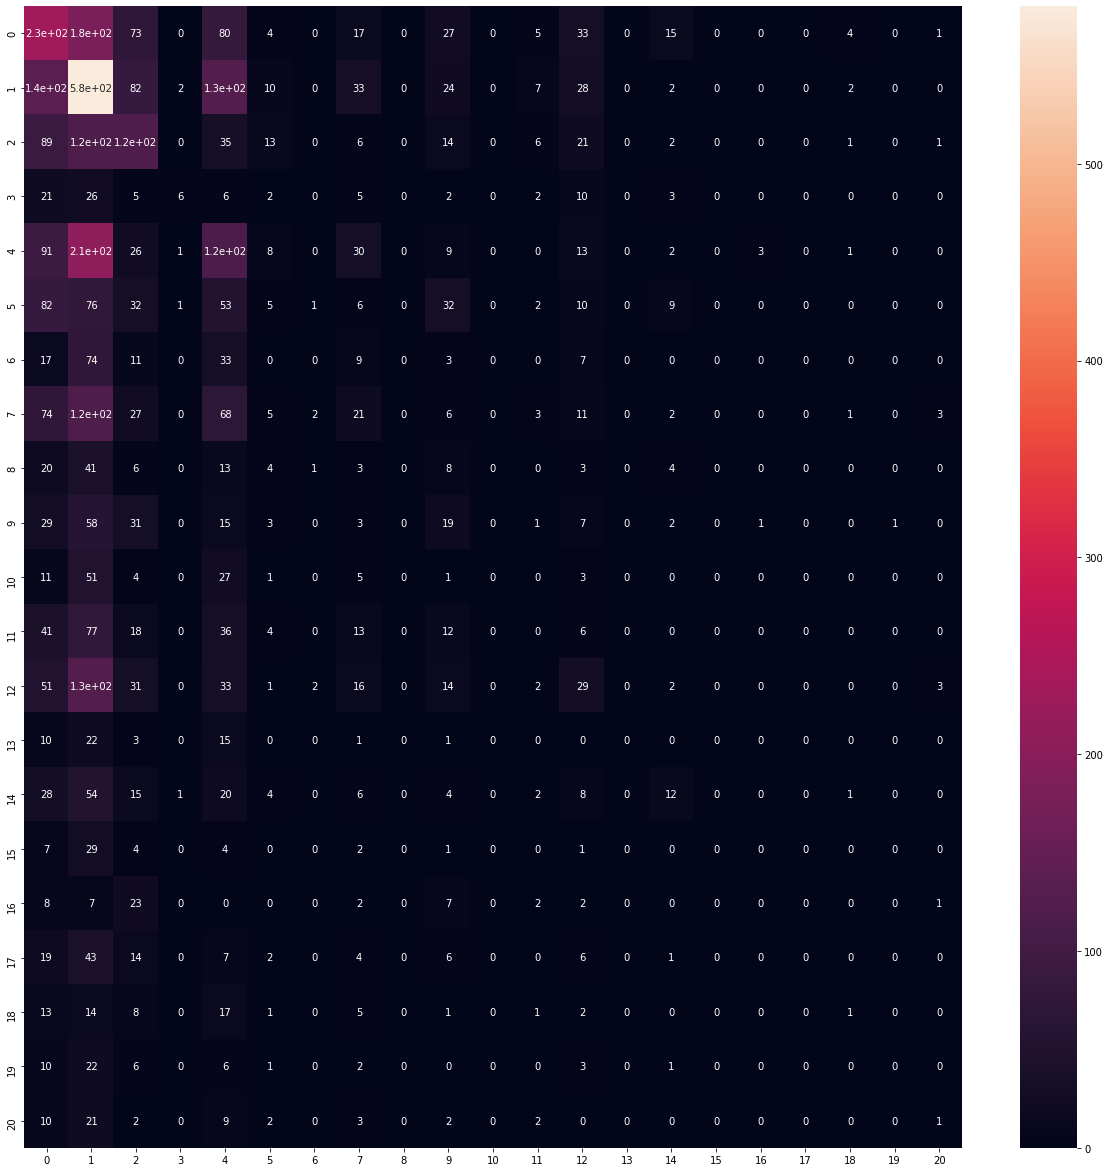

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(21,21))
sns.heatmap(c_matrix, annot=True)